# Title : Evaluating Machine Learning Algorithms for Banking Customer Churn Prediction

# Mouting to the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries , Dataset and Basic Operations

In [2]:
import pandas as pd
import numpy as np

# It is Used to loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv')

# It is used to Display basic info
print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n")
print(df.head())

# It is used to Display basic information about columns, datatypes, and missing values
print("\nDataset Information:")
print(df.info())

# It is Used to Check basic statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

Dataset loaded successfully!
Shape of dataset: (10000, 14)

First 5 rows:

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       

# Comprehensive Exploratory Data Analysis (EDA) : Basics and Visualisations

Number of observations (rows): 10000
Number of features (columns): 14

Feature Names:
 ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Detected Target (Dependent) Variable: Exited

Independent Variables:
 ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

Number of categorical features: 3
Categorical feature names: ['Surname', 'Geography', 'Gender']


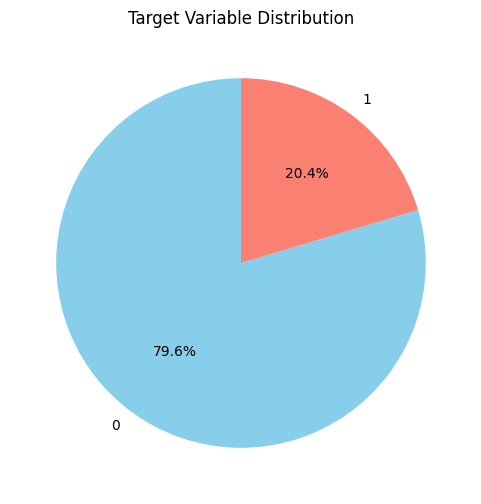

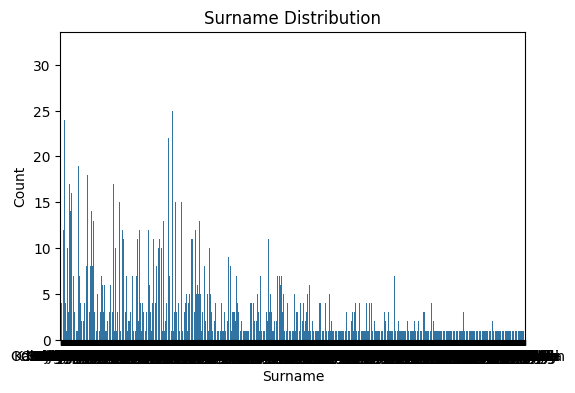

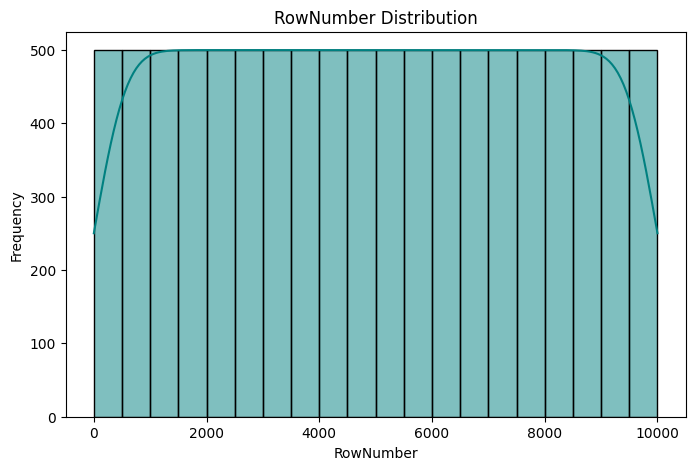

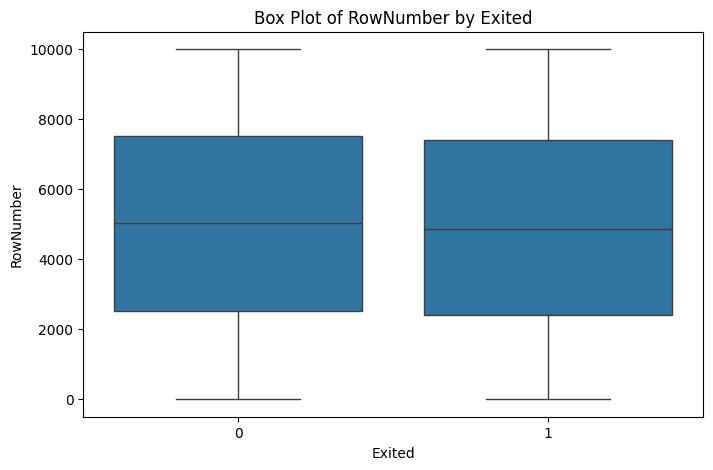

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# It is Used to Print Basic info
print("Number of observations (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])
print("\nFeature Names:\n", df.columns.tolist())

# Detecting Target Variable
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
target_var = binary_cols[-1] if len(binary_cols) > 0 else None
print("\nDetected Target (Dependent) Variable:", target_var)

# It is used to  Identify independent variables
independent_vars = [col for col in df.columns if col != target_var]
print("\nIndependent Variables:\n", independent_vars)

# It is used to Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nNumber of categorical features:", len(categorical_features))
print("Categorical feature names:", categorical_features)

#  Pie chart – Target variable distribution
if target_var:
    plt.figure(figsize=(6, 6))
    df[target_var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'salmon']
    )
    plt.title("Target Variable Distribution")
    plt.ylabel("")
    plt.show()

#  Bar chart – First categorical feature
if len(categorical_features) > 0:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=categorical_features[0], data=df)
    plt.title(f"{categorical_features[0]} Distribution")
    plt.xlabel(categorical_features[0])
    plt.ylabel("Count")
    plt.show()

#  Histogram – First numeric feature
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_features) > 0:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[numeric_features[0]], bins=20, kde=True, color='teal')
    plt.title(f"{numeric_features[0]} Distribution")
    plt.xlabel(numeric_features[0])
    plt.ylabel("Frequency")
    plt.show()

#  Box plot – Compare first numeric feature by target
if target_var and len(numeric_features) > 0:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target_var, y=numeric_features[0], data=df)
    plt.title(f"Box Plot of {numeric_features[0]} by {target_var}")
    plt.xlabel(target_var)
    plt.ylabel(numeric_features[0])
    plt.show()


# Data Preprocessing , Spltting the dataset and Feature Scaling

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Dropping Irrelevalant Columns
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_clean = df.drop(columns=cols_to_drop)

print("Dropped Irrelevant Columns:", cols_to_drop)
print("New Shape:", df_clean.shape)

# Checking Missing Values
print("\nMissing Values:\n", df_clean.isnull().sum())

# Label Enconding for Binary Categorical Features
le = LabelEncoder()
for col in df_clean.select_dtypes(include='object').columns:
    if df_clean[col].nunique() == 2:
        df_clean[col] = le.fit_transform(df_clean[col])
        print(f"Label Encoded: {col}")

# One - Hot Enconding for Multi-Class Categorical Features
df_clean = pd.get_dummies(df_clean, drop_first=True)
print("\nAfter One-Hot Encoding:", df_clean.shape)


# Defining X,y
X = df_clean.drop(target_var, axis=1)
y = df_clean[target_var]

print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)

# Splitting the Dataset Into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain/Test Split Completed!")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling done!")


Dropped Irrelevant Columns: ['RowNumber', 'CustomerId', 'Surname']
New Shape: (10000, 11)

Missing Values:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Label Encoded: Gender

After One-Hot Encoding: (10000, 12)

Shape of X: (10000, 11)
Shape of y: (10000,)

Train/Test Split Completed!
X_train: (8000, 11)
X_test: (2000, 11)

Feature scaling done!


# Synthetic Minority OverSampling Technique (SMOTE) => It is used for Class Imbalance

In [5]:
from imblearn.over_sampling import SMOTE

# Creating SMOTE object
smote = SMOTE(random_state=42)

# Applying only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.value_counts().to_dict())
print("After SMOTE :", X_train_resampled.shape, y_train_resampled.value_counts().to_dict())


Before SMOTE: (8000, 11) {0: 6370, 1: 1630}
After SMOTE : (12740, 11) {1: 6370, 0: 6370}


# Modelling

# Evaluation Functions , common for all algorithms

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Re-scaling after SMOTE (important)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("Shapes after scaling:")
print("X_train_resampled_scaled:", X_train_resampled_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)


Shapes after scaling:
X_train_resampled_scaled: (12740, 11)
X_test_scaled: (2000, 11)


# Logistic Regression

Logistic Regression Accuracy: 0.745

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1593
           1       0.41      0.55      0.47       407

    accuracy                           0.74      2000
   macro avg       0.64      0.67      0.65      2000
weighted avg       0.78      0.74      0.76      2000

Confusion Matrix:
 [[1266  327]
 [ 183  224]]


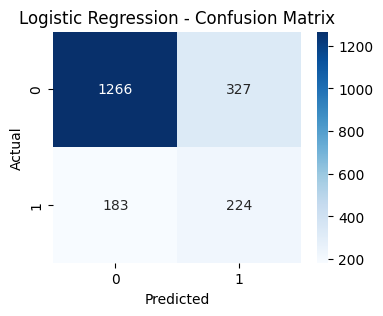

Logistic Regression ROC-AUC: 0.746276322547509


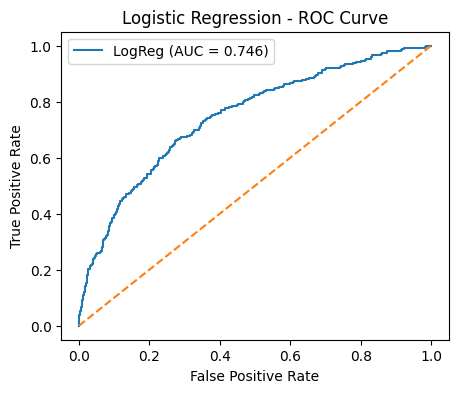

In [7]:
from sklearn.linear_model import LogisticRegression

# Defining the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Training the model
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)

# Classification Report
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC and ROC Curve
auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression ROC-AUC:", auc_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(5, 4))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {auc_lr:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()


# K-Nearest Neighbour [KNN]

KNN Accuracy: 0.7785

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1593
           1       0.47      0.61      0.53       407

    accuracy                           0.78      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.80      0.78      0.79      2000

Confusion Matrix:
 [[1310  283]
 [ 160  247]]


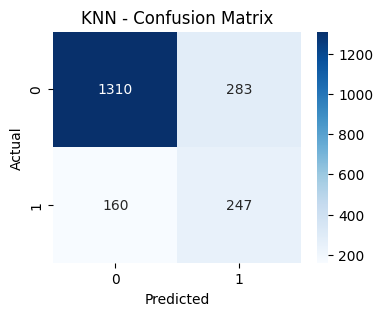

KNN ROC-AUC: 0.7754040635396566


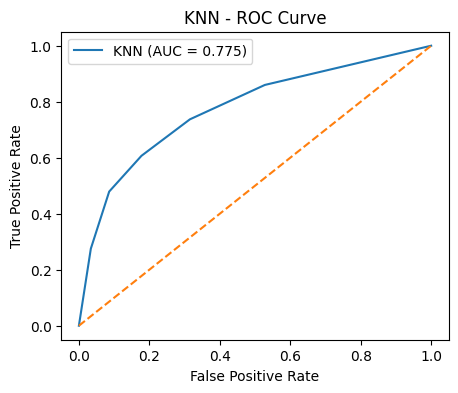

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the model
knn = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

# Classification Report
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC and ROC Curve
auc_knn = roc_auc_score(y_test, y_proba_knn)
print("KNN ROC-AUC:", auc_knn)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

plt.figure(figsize=(5, 4))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN - ROC Curve")
plt.legend()
plt.show()


# Random Forest

Random Forest Accuracy: 0.8225

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1593
           1       0.56      0.64      0.59       407

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000

Confusion Matrix:
 [[1385  208]
 [ 147  260]]


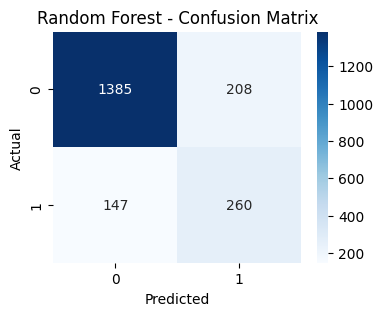

Random Forest ROC-AUC: 0.8450522942048365


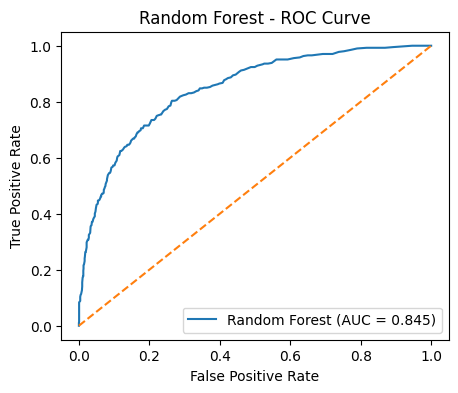

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Defining the model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Training the model
rf.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

# Classification Report
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC and ROC Curve
auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest ROC-AUC:", auc_rf)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.legend()
plt.show()


# Gradient Boosting

Gradient Boosting Accuracy: 0.8185

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.54      0.68      0.60       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000

Confusion Matrix:
 [[1360  233]
 [ 130  277]]


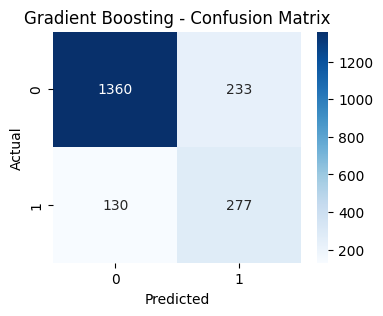

Gradient Boosting ROC-AUC: 0.8558003303766014


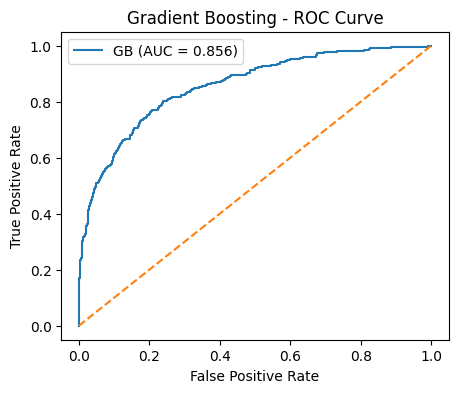

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Defining the model
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Training the model
gb.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_gb = gb.predict(X_test_scaled)
y_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", acc_gb)

# Classification Report
print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", cm_gb)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC and ROC Curve
auc_gb = roc_auc_score(y_test, y_proba_gb)
print("Gradient Boosting ROC-AUC:", auc_gb)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

plt.figure(figsize=(5, 4))
plt.plot(fpr_gb, tpr_gb, label=f"GB (AUC = {auc_gb:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting - ROC Curve")
plt.legend()
plt.show()


# XGBoost

XGBoost Accuracy: 0.82

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.55      0.66      0.60       407

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000

Confusion Matrix:
 [[1371  222]
 [ 138  269]]


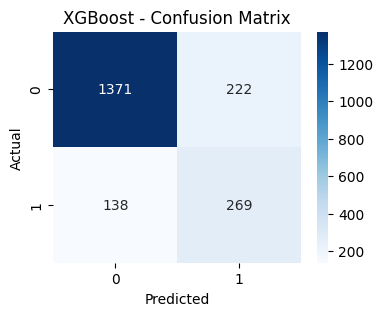

XGBoost ROC-AUC: 0.8445240309647091


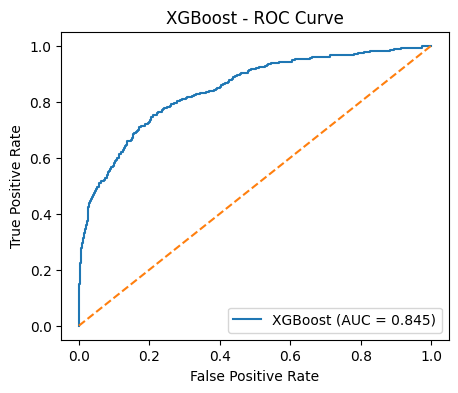

In [11]:
from xgboost import XGBClassifier

# Defining the model
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Training the model
xgb.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb)

# Classification Report
print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", cm_xgb)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC and ROC Curve
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("XGBoost ROC-AUC:", auc_xgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(5, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - ROC Curve")
plt.legend()
plt.show()


# ROC -AUC Curve For all Models

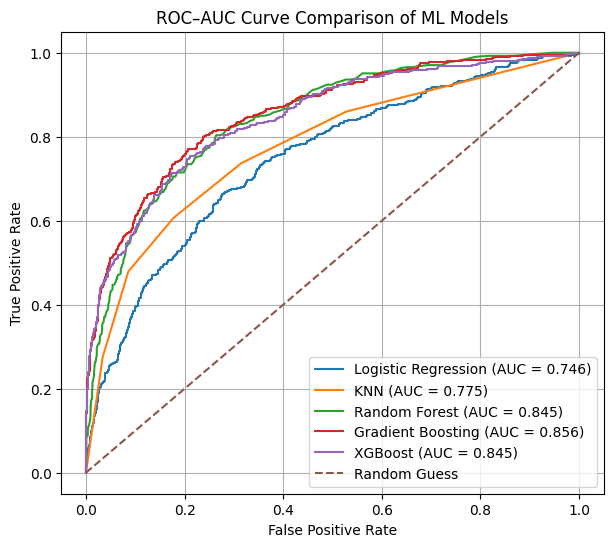

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculating ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Calculating AUC scores
auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_knn = roc_auc_score(y_test, y_proba_knn)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_gb = roc_auc_score(y_test, y_proba_gb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Plotting all ROC curves together
plt.figure(figsize=(7, 6))

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_gb:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve Comparison of ML Models")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()


# Accuracy Values Comparison => Bar Graph

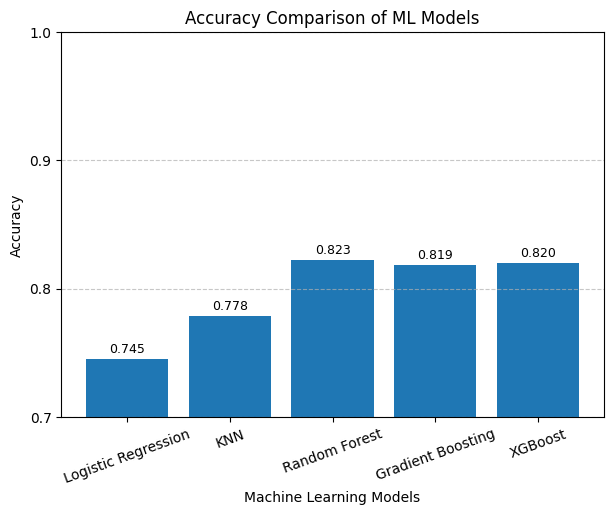

In [13]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    'Logistic Regression',
    'KNN',
    'Random Forest',
    'Gradient Boosting',
    'XGBoost'
]

accuracies = [
    acc_lr,
    acc_knn,
    acc_rf,
    acc_gb,
    acc_xgb
]

plt.figure(figsize=(7, 5))
plt.bar(models, accuracies)

plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of ML Models")

# Y-axis settings
plt.ylim(0.70, 1.00)
plt.yticks(np.arange(0.70, 1.01, 0.10))

plt.xticks(rotation=20)

# Display values on each bar
for i, value in enumerate(accuracies):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Comparison Using F1-Score (Macro)

Logistic Regression F1-macro : 0.6499940293099118
KNN F1-macro                : 0.6912925330771689
Random Forest F1-macro      : 0.7403428571428572
Gradient Boosting F1-macro  : 0.7432007445056101
XGBoost F1-macro            : 0.741527486397884


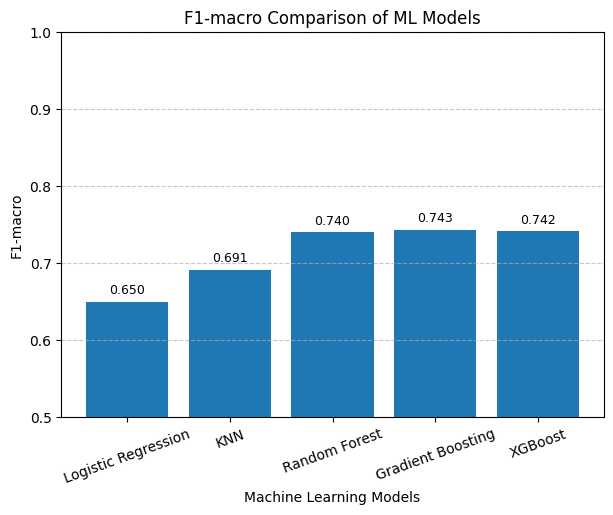

In [15]:

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Computing F1-macro scores
f1_macro_lr  = f1_score(y_test, y_pred_lr, average='macro')
f1_macro_knn = f1_score(y_test, y_pred_knn, average='macro')
f1_macro_rf  = f1_score(y_test, y_pred_rf, average='macro')
f1_macro_gb  = f1_score(y_test, y_pred_gb, average='macro')
f1_macro_xgb = f1_score(y_test, y_pred_xgb, average='macro')

# Printing values
print("Logistic Regression F1-macro :", f1_macro_lr)
print("KNN F1-macro                :", f1_macro_knn)
print("Random Forest F1-macro      :", f1_macro_rf)
print("Gradient Boosting F1-macro  :", f1_macro_gb)
print("XGBoost F1-macro            :", f1_macro_xgb)


models = [
    'Logistic Regression',
    'KNN',
    'Random Forest',
    'Gradient Boosting',
    'XGBoost'
]

f1_macro_scores = [
    f1_macro_lr,
    f1_macro_knn,
    f1_macro_rf,
    f1_macro_gb,
    f1_macro_xgb
]

plt.figure(figsize=(7, 5))
plt.bar(models, f1_macro_scores)

plt.xlabel("Machine Learning Models")
plt.ylabel("F1-macro")
plt.title("F1-macro Comparison of ML Models")

plt.ylim(0.50, 1.00)
plt.yticks(np.arange(0.50, 1.01, 0.10))
plt.xticks(rotation=20)

# Annotating bar values
for i, value in enumerate(f1_macro_scores):
    plt.text(i, value + 0.01, f"{value:.3f}", ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Logistic Regression F1-weighted : 0.7581294239725266
KNN F1-weighted                : 0.7885907981481732
Random Forest F1-weighted      : 0.8269547428571429
Gradient Boosting F1-weighted  : 0.8256614250377858
XGBoost F1-weighted            : 0.8259815709097802


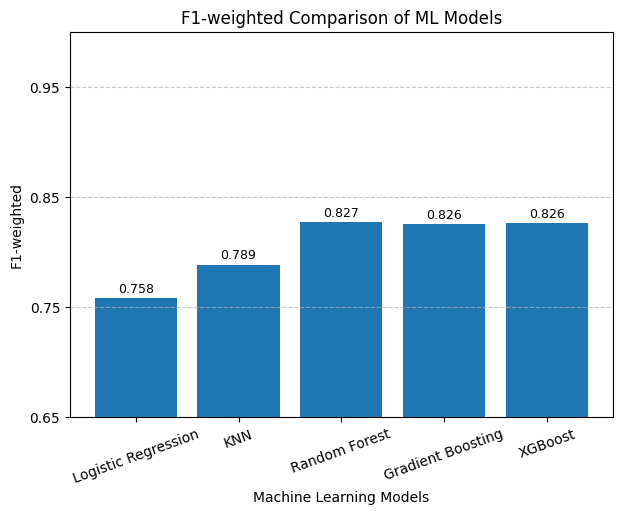

In [19]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Computing F1-weighted scores
f1_weighted_lr  = f1_score(y_test, y_pred_lr, average='weighted')
f1_weighted_knn = f1_score(y_test, y_pred_knn, average='weighted')
f1_weighted_rf  = f1_score(y_test, y_pred_rf, average='weighted')
f1_weighted_gb  = f1_score(y_test, y_pred_gb, average='weighted')
f1_weighted_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Printing values
print("Logistic Regression F1-weighted :", f1_weighted_lr)
print("KNN F1-weighted                :", f1_weighted_knn)
print("Random Forest F1-weighted      :", f1_weighted_rf)
print("Gradient Boosting F1-weighted  :", f1_weighted_gb)
print("XGBoost F1-weighted            :", f1_weighted_xgb)


models = [
    'Logistic Regression',
    'KNN',
    'Random Forest',
    'Gradient Boosting',
    'XGBoost'
]

f1_weighted_scores = [
    f1_weighted_lr,
    f1_weighted_knn,
    f1_weighted_rf,
    f1_weighted_gb,
    f1_weighted_xgb
]

plt.figure(figsize=(7, 5))
plt.bar(models, f1_weighted_scores)

plt.xlabel("Machine Learning Models")
plt.ylabel("F1-weighted")
plt.title("F1-weighted Comparison of ML Models")

plt.ylim(0.65, 1.00)
plt.yticks(np.arange(0.65, 1.01, 0.10))
plt.xticks(rotation=20)

# Display values on bars
for i, value in enumerate(f1_weighted_scores):
    plt.text(i, value + 0.005, f"{value:.3f}", ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Comparing F-1 Score

Logistic Regression Churn F1 : 0.46764091858037576
KNN Churn F1                : 0.5272145144076841
Random Forest Churn F1      : 0.5942857142857143
Gradient Boosting Churn F1  : 0.604143947655398
XGBoost Churn F1            : 0.5991091314031181


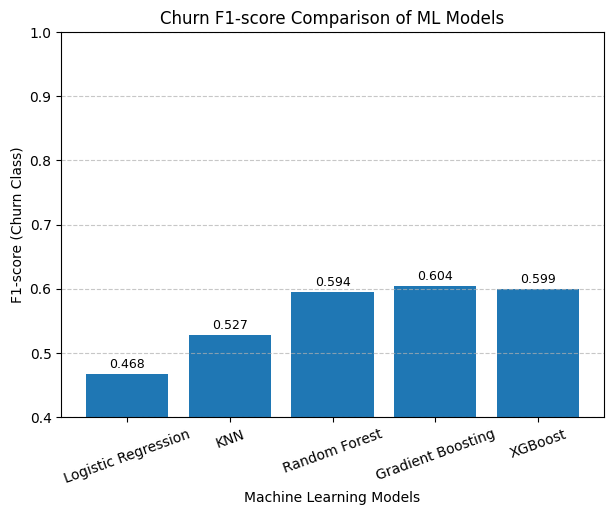

In [17]:

from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Compute F1-score for churn class (class = 1)
f1_lr  = f1_score(y_test, y_pred_lr, pos_label=1)
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1)
f1_rf  = f1_score(y_test, y_pred_rf, pos_label=1)
f1_gb  = f1_score(y_test, y_pred_gb, pos_label=1)
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)

# Printing values
print("Logistic Regression Churn F1 :", f1_lr)
print("KNN Churn F1                :", f1_knn)
print("Random Forest Churn F1      :", f1_rf)
print("Gradient Boosting Churn F1  :", f1_gb)
print("XGBoost Churn F1            :", f1_xgb)


models = [
    'Logistic Regression',
    'KNN',
    'Random Forest',
    'Gradient Boosting',
    'XGBoost'
]

f1_scores = [
    f1_lr,
    f1_knn,
    f1_rf,
    f1_gb,
    f1_xgb
]

plt.figure(figsize=(7, 5))
plt.bar(models, f1_scores)

plt.xlabel("Machine Learning Models")
plt.ylabel("F1-score (Churn Class)")
plt.title("Churn F1-score Comparison of ML Models")

plt.ylim(0.40, 1.00)
plt.yticks(np.arange(0.40, 1.01, 0.10))

plt.xticks(rotation=20)

# Display values on each bar
for i, value in enumerate(f1_scores):
    plt.text(i, value + 0.01, f"{value:.3f}", ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
